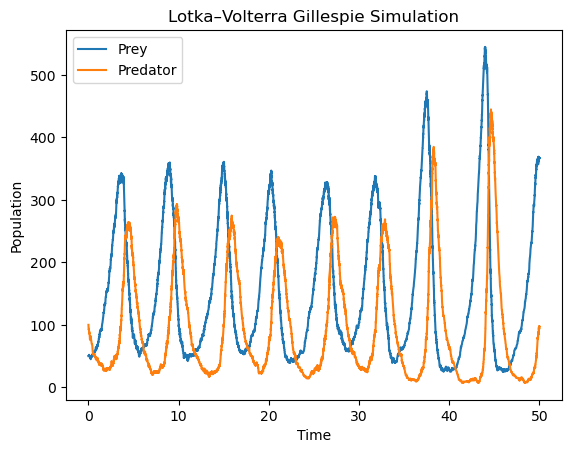

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def gillespie_lotka_volterra(
    x0=50,          # initial prey
    y0=100,         # initial predators
    t_max=50.0,     # maximum simulation time
    alpha=1.0,      # prey birth rate
    beta=0.01,      # predation rate
    gamma=1.5,      # predator death rate
    max_steps=100000
):
    """
    Stochastic Lotka-Volterra model using Gillespie's SSA.

    Reactions:
      1) Prey birth:          X -> X + 1          with rate alpha * X
      2) Predation:           X + Y -> Y + 1      with rate beta * X * Y
         (prey dies, predator reproduces)
      3) Predator death:      Y -> Y - 1          with rate gamma * Y

    Returns:
      pandas.DataFrame with columns ['time', 'Prey', 'Predator'].
    """
    # Initialize
    t = 0.0
    X = x0
    Y = y0

    times = [t]
    prey = [X]
    predator = [Y]

    step = 0
    while t < t_max and step < max_steps and (X > 0 or Y > 0):
        # Propensities
        a1 = alpha * X           # prey birth
        a2 = beta * X * Y        # predation
        a3 = gamma * Y           # predator death

        a0 = a1 + a2 + a3        # total rate

        if a0 <= 0:
            # No more reactions possible
            break

        # Draw two uniform random numbers
        r1 = np.random.random()
        r2 = np.random.random()

        # Time to next reaction
        tau = -np.log(r1) / a0
        t += tau

        # Determine which reaction occurs
        threshold = r2 * a0

        if threshold < a1:
            # Prey birth
            X += 1
        elif threshold < a1 + a2:
            # Predation (prey dies, predator reproduces)
            if X > 0:  # avoid negative
                X -= 1
            Y += 1
        else:
            # Predator death
            if Y > 0:
                Y -= 1

        times.append(t)
        prey.append(X)
        predator.append(Y)

        step += 1

    df = pd.DataFrame({
        "time": times,
        "Prey": prey,
        "Predator": predator
    })

    return df

# Example usage:
if __name__ == "__main__":
    df = gillespie_lotka_volterra(
        x0=50,
        y0=100,
        t_max=50,
        alpha=1.0,
        beta=0.01,
        gamma=1.5
    )

    # Plot, similar idea to ggplot in the RPub
    fig, ax = plt.subplots()
    ax.plot(df["time"], df["Prey"], label="Prey")
    ax.plot(df["time"], df["Predator"], label="Predator")
    ax.set_xlabel("Time")
    ax.set_ylabel("Population")
    ax.set_title("Lotka–Volterra Gillespie Simulation")
    ax.legend()
    plt.show()